In [6]:
#Importamos la Librerias
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import pandas as pd
from matplotlib import pyplot
import matplotlib

# Datos de la Bolsa de Madrid

---

In [7]:
#Enlace de la Bolsa Madrid
url="https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000"
path='Practico 2/Webscraping/Jupyter/csv/bolsaMadrid.csv'

In [8]:
#Haremos el request a esa ruta
#Procesamos el HTML mediante BeautifulSoap
req = requests.get(url).text
soup = BeautifulSoup(req, "lxml")

In [9]:
# Obtenemos la tabla por un ID específico
table = soup.find("table", {"id":"ctl00_Contenido_tblAcciones"})


In [10]:
name=""
price=""
diferencia=""
maximo=""
minimo=""
numRow=0

for row in table.find_all("tr"):
  numCell=0
  for cell in row.find_all("td"):
    if numCell == 0:
      name=cell.text
      
      print("Accion:", name)
    if numCell == 1:
      price=cell.text

      print("Ultimo:", price)
    if numCell == 2:
      diferencia=cell.text
      print("Diferencia:", diferencia)
    if numCell == 3:
      maximo=cell.text
      print("Maximo:", maximo)
    if numCell == 4:
      minimo=cell.text
      print("Minimo:", minimo,'\n')
    numCell+=1
  numRow+=1    

  #Creamos el CSV
  with open(path, 'a',  newline="") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow([name, price, diferencia, maximo, minimo, datetime.now()])
  csv_file.close()
df = pd.read_csv(path)



Accion: ACCIONA
Ultimo: 166,0000
Diferencia: 0,12
Maximo: 168,9000
Minimo: 165,9000 

Accion: ACERINOX
Ultimo: 12,2450
Diferencia: 1,74
Maximo: 12,3450
Minimo: 12,1500 

Accion: ACS
Ultimo: 23,0200
Diferencia: 1,72
Maximo: 23,2000
Minimo: 22,8000 

Accion: AENA
Ultimo: 145,6500
Diferencia: 2,82
Maximo: 146,3500
Minimo: 141,1000 

Accion: ALMIRALL
Ultimo: 13,2100
Diferencia: 2,80
Maximo: 13,2500
Minimo: 12,9500 

Accion: AMADEUS
Ultimo: 58,0000
Diferencia: 0,28
Maximo: 58,6000
Minimo: 57,4400 

Accion: ARCELORMIT.
Ultimo: 29,9000
Diferencia: 1,91
Maximo: 30,1450
Minimo: 29,6200 

Accion: B.SANTANDER
Ultimo: 3,3435
Diferencia: 2,04
Maximo: 3,3535
Minimo: 3,2755 

Accion: BA.SABADELL
Ultimo: 0,6990
Diferencia: 0,37
Maximo: 0,7184
Minimo: 0,6970 

Accion: BANKINTER
Ultimo: 4,9090
Diferencia: 3,09
Maximo: 4,9570
Minimo: 4,7850 

Accion: BBVA
Ultimo: 6,2790
Diferencia: 3,58
Maximo: 6,2920
Minimo: 6,0300 

Accion: CAIXABANK
Ultimo: 2,4870
Diferencia: 0,08
Maximo: 2,5100
Minimo: 2,4700 

Accio

# Tabla
---

In [11]:
#Creamos las columnas para el DataFrame
columnsName = ["Accion", "Precio", "%Diferencia", "Maximo", "Minimo", "Fecha"]
df.columns = columnsName

#Eliminamos Datos NaN
df = df.dropna()

#Convertimos en float
df['Precio'] = df['Precio'].apply(lambda x: x.replace(',','.'))
df['Precio'] = df['Precio'].astype(float)

df['%Diferencia'] = df['%Diferencia'].apply(lambda x: x.replace(',','.'))
df['%Diferencia'] = df['%Diferencia'].astype(float)

df['Maximo'] = df['Maximo'].apply(lambda x: x.replace(',','.'))
df['Maximo'] = df['Maximo'].astype(float)

df['Minimo'] = df['Minimo'].apply(lambda x: x.replace(',','.'))
df['Minimo'] = df['Minimo'].astype(float)

#Ordenamos la columna Precio
df=df.sort_values("Precio")
df.to_csv(path, index=False)
df


,Accion,Precio,%Diferencia,Maximo,Minimo,Fecha
8,BA.SABADELL,0.6990,0.37,0.7184,0.6970,2021-11-01 20:31:01.014176
19,IAG,1.9690,1.78,1.9800,1.9070,2021-11-01 20:31:01.034026
24,MAPFRE,1.9700,7.62,1.9835,1.8590,2021-11-01 20:31:01.044252
11,CAIXABANK,2.4870,0.08,2.5100,2.4700,2021-11-01 20:31:01.018928
7,B.SANTANDER,3.3435,2.04,3.3535,3.2755,2021-11-01 20:31:01.011974
33,TELEFONICA,3.8165,1.38,3.8445,3.7490,2021-11-01 20:31:01.063377
9,BANKINTER,4.9090,3.09,4.9570,4.7850,2021-11-01 20:31:01.016008
10,BBVA,6.2790,3.58,6.2920,6.0300,2021-11-01 20:31:01.017694
25,MELIA HOTELS,6.4360,1.16,6.5300,6.3500,2021-11-01 20:31:01.046688
23,INM.COLONIAL,8.3100,-1.19,8.4250,8.2300,2021-11-01 20:31:01.042061


# Mayor Ganancia y Mayor Pérdida 

---



In [12]:
#Calculamos Maximo y minimo
maxGanancia = df['Precio'].max()
maxPerdida = df['Precio'].min()
print("Mayor ganancia:", maxGanancia, "\nMayor pérdida:",maxPerdida)


Mayor ganancia: 166.0 
Mayor pérdida: 0.699


# Gráfico

---

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

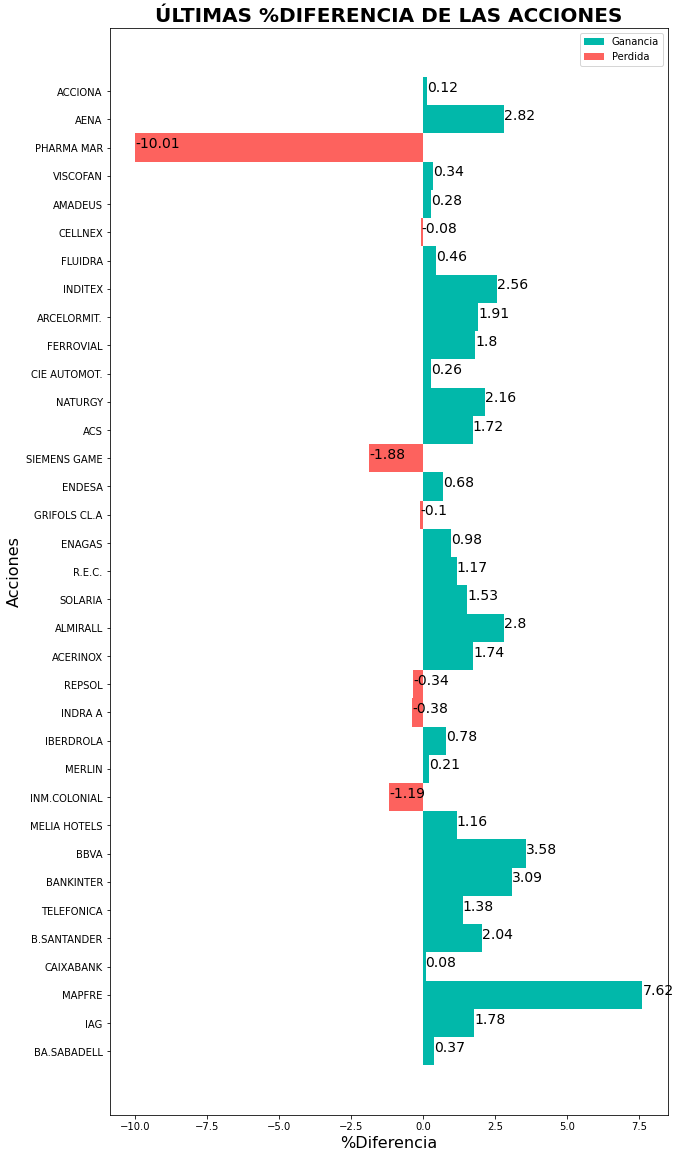

In [14]:
y = df['%Diferencia']
x = df['Accion']

plt.figure(figsize=(10,20))

mayG = df['%Diferencia'] > 0
mayP = df['%Diferencia'] <= 0

mY=plt.barh(x, y, mayG, color='#01b8aa', label="Ganancia")
my=plt.barh(x, y, mayP, color='#fd625e', label="Perdida")
for index, value in enumerate(y):
    plt.text(value, index, str(value), fontsize=14, color='black')


plt.ylabel('Acciones',fontsize=16)
plt.xlabel('%Diferencia',fontsize=16)
plt.title('ÚLTIMAS %DIFERENCIA DE LAS ACCIONES',fontsize=20, fontweight='bold')

plt.legend()
plt.show();

